Notebook that generates the plots with data from the simulator, for the initial wavefunction $|\psi(0)\rangle_A=|1\rangle^{\otimes \Omega/2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "font.size": 14
})
plt.rcParams['figure.dpi']= 200

In [3]:
imIcon = plt.imread('ideal-quantum-simulation-classical-hardware.png')

In [4]:
npairs=4
tfin=2
npoints=28
nshots=1000

set3=[1,0.5,1.5]
params=set3

ntrotsteps = [1,2,4,8,16,32]

dataPsi0N4 = np.empty((len(ntrotsteps),3,npoints))
dataNpairN4 = np.empty((len(ntrotsteps),3,npoints))
dataTzN4 = np.empty((len(ntrotsteps),3,npoints))

for indt,ntrot in enumerate(ntrotsteps):
    for i in range(npoints):
        dt = tfin*i/npoints
        df = pd.read_hdf(f'data/simulator2/agassi_Np{npairs}_tf{tfin}_trot{ntrot}.h5', key=f't{i}')  
        dfArray =[df[j].map(str) for j in range(npairs)]
        shotsind = [''.join(j) for j in zip(*dfArray)]
        setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
        dataPsi0N4[indt,0,i] = dt
        if '1111' not in setList.keys():
            setList['1111'] = 0
        dataPsi0N4[indt,1,i] = setList['1111']
        dataPsi0N4[indt,2,i] = np.sqrt(setList['1111']*(1-setList['1111'])/nshots)
        dataNpairN4[indt,0,i] = dt
        dataNpairN4[indt,1,i] = 0
        dataNpairN4[indt,2,i] = 0
        dataTzN4[indt,0,i] = dt
        dataTzN4[indt,1,i] = 0
        dataTzN4[indt,2,i] = 0
        
        for pa in range(npairs):
            dfArray =[df[pa].map(str)]
            shotsind = [''.join(j) for j in zip(*dfArray)]
            setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
            if '0' not in setList.keys():
                setList['0'] = 0
            if '1' not in setList.keys():
                setList['1'] = 0
            if '2' not in setList.keys():
                setList['2'] = 0
            if '3' not in setList.keys():
                setList['3'] = 0
            if '4' not in setList.keys():
                setList['4'] = 0
                
            dataNpairN4[indt,1,i] += (setList['1']*1 + setList['3']*1 + setList['4']*2)
            dataNpairN4[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots + 4*setList['4']*(1-setList['4'])/nshots
            
            dataTzN4[indt,1,i] += (setList['1']*-1 + setList['3']*1)
            dataTzN4[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots
            
        dataNpairN4[indt,2,i] = np.sqrt(dataNpairN4[indt,2,i])
        dataTzN4[indt,2,i] = np.sqrt(dataTzN4[indt,2,i])

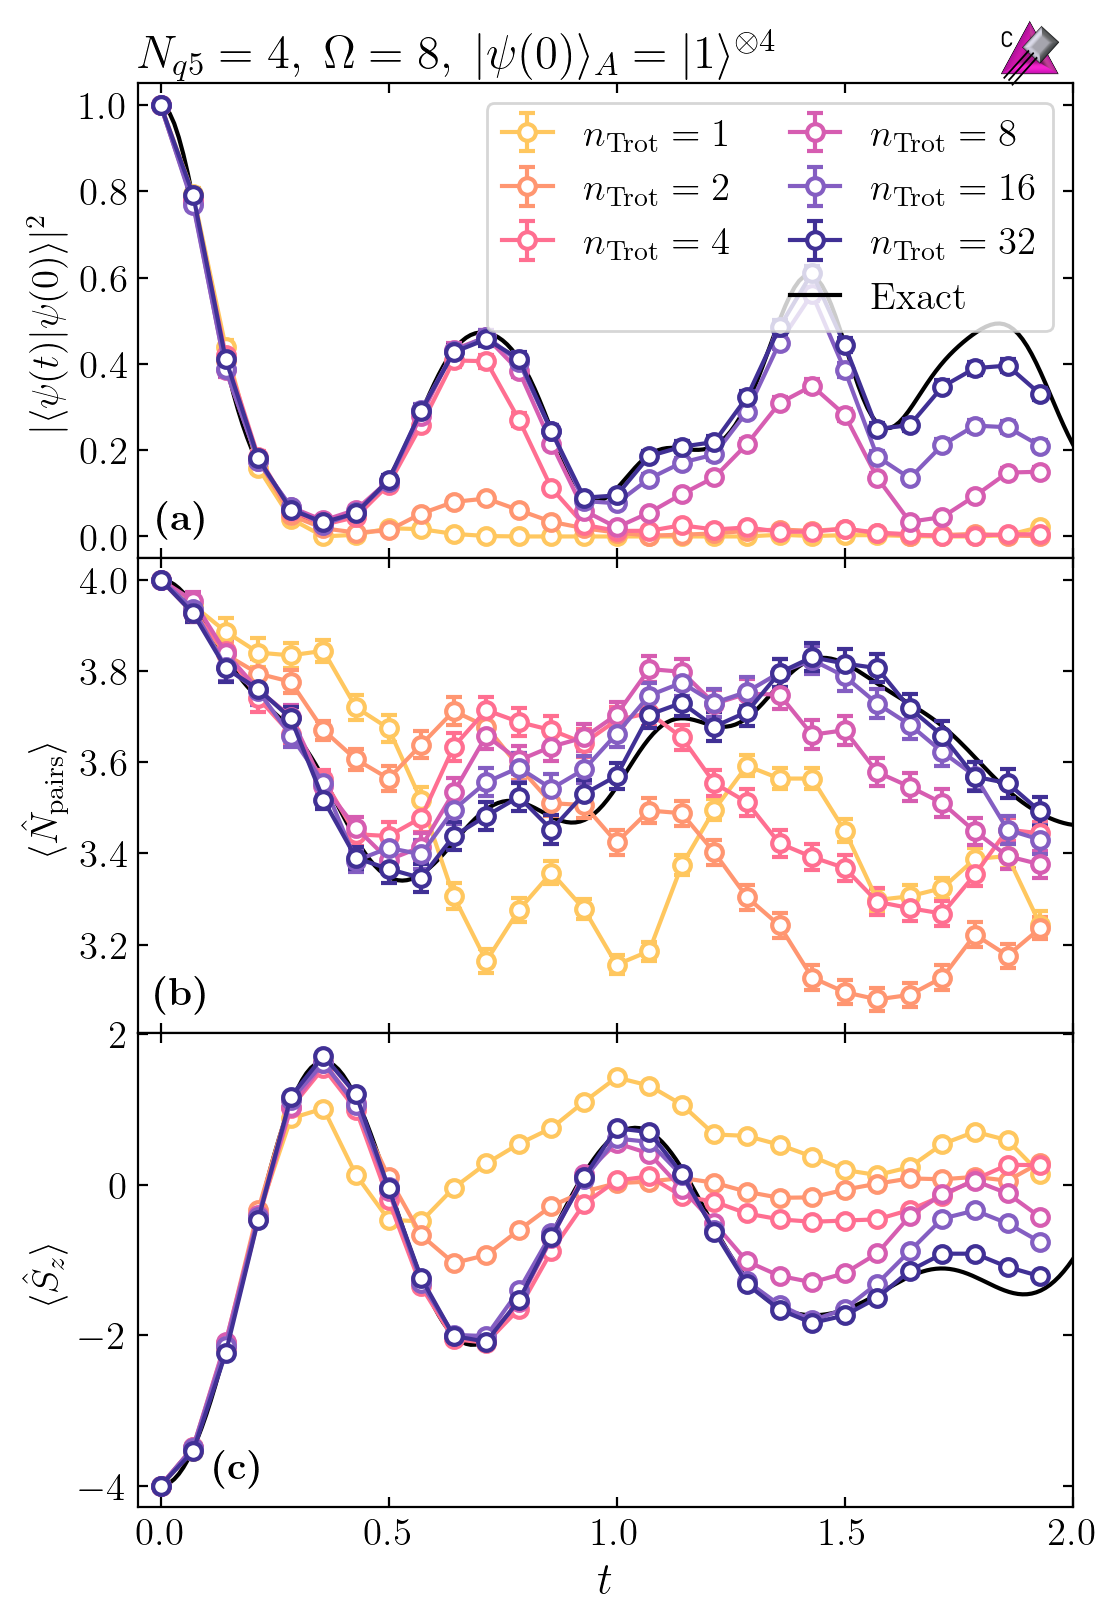

In [5]:
fig = plt.figure(figsize=(5.5, 8))
axs = fig.subplots(3,1, sharex=True)
plt.subplots_adjust(left=0.12, bottom=0.06, right=0.97, top=0.95, wspace=0, hspace=0)

colortrot =['#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2','#403095']

dataPsi0N4exact = np.transpose(np.genfromtxt(f'data/exact2/psi0_Np4_set3.dat'))
dataNpairN4exact = np.transpose(np.genfromtxt(f'data/exact2/npair_Np4_set3.dat'))
dataTzN4exact = np.transpose(np.genfromtxt(f'data/exact2/tz_Np4_set3.dat'))

axs[0].plot(dataPsi0N4exact[0],dataPsi0N4exact[1],c='k',marker='',ls='-',label=r'$\rm{{Exact}}$')
for indt,ntrot in enumerate(ntrotsteps):
    axs[0].errorbar(dataPsi0N4[indt,0],dataPsi0N4[indt,1],dataPsi0N4[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3,label=f'$n_{{\\rm{{Trot}}}}={ntrot}$')
axs[0].plot(np.NaN, np.NaN, '-', color='none', label=' ')  #Needed for extra space in legend between points and line
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles[2:5]+[handles[1]]+handles[5:]+[handles[0]], labels=labels[2:5]+[labels[1]]+labels[5:]+[labels[0]]
              ,ncol=2,handlelength=1.3,columnspacing=1.5,loc='upper right')
axs[0].set_xlim([-0.05,2])
axs[0].set_ylabel(r'$|\langle \psi(t)|\psi(0) \rangle|^2$', fontsize=14)
axs[0].tick_params(right=True, top=True, direction='in')
axs[0].text(0.05, 0.08, r'\bf (a)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title(r'$N_{{q5}} = 4,\; \Omega = 8,\; | \psi (0) \rangle_A=|1\rangle^{{\otimes 4}}$', loc='left')

axs[1].plot(dataNpairN4exact[0],dataNpairN4exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[1].errorbar(dataNpairN4[indt,0],dataNpairN4[indt,1],dataNpairN4[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[1].set_ylabel(r'$\langle \hat{N}_{\rm{pairs}}\rangle$', fontsize=14)
axs[1].tick_params(right=True, top=True, direction='in')
axs[1].text(0.05, 0.08, r'\bf (b)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[2].plot(dataTzN4exact[0],dataTzN4exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[2].errorbar(dataTzN4[indt,0],dataTzN4[indt,1],dataTzN4[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[2].set_xlabel(r'$t$', fontsize=16)
axs[2].set_ylabel(r'$\langle \hat{S}_{z} \rangle$', fontsize=14)
axs[2].tick_params(right=True, top=True, direction='in')
axs[2].text(0.11, 0.08, r'\bf (c)', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

fig.align_ylabels()

axIcon = fig.add_axes([0.9, 0.93, 0.06, 0.06], anchor='NE', zorder=30)
axIcon.imshow(imIcon)
axIcon.axis('off')

with PdfPages('Nq4_initwvfn2.pdf') as pdf:
    pdf.savefig(transparent=True)
    
plt.show()

In [6]:
npairs=6
tfin=2
npoints=28
nshots=1000

set3=[1,0.5,1.5]
params=set3

ntrotsteps = [1,2,4,8,16,32]

dataPsi0N6 = np.empty((len(ntrotsteps),3,npoints))
dataNpairN6 = np.empty((len(ntrotsteps),3,npoints))
dataTzN6 = np.empty((len(ntrotsteps),3,npoints))

for indt,ntrot in enumerate(ntrotsteps):
    for i in range(npoints):
        dt = tfin*i/npoints
        df = pd.read_hdf(f'data/simulator2/agassi_Np{npairs}_tf{tfin}_trot{ntrot}.h5', key=f't{i}')  
        dfArray =[df[j].map(str) for j in range(npairs)]
        shotsind = [''.join(j) for j in zip(*dfArray)]
        setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
        dataPsi0N6[indt,0,i] = dt
        if '111111' not in setList.keys():
            setList['111111'] = 0
        dataPsi0N6[indt,1,i] = setList['111111']
        dataPsi0N6[indt,2,i] = np.sqrt(setList['111111']*(1-setList['111111'])/nshots)
        dataNpairN6[indt,0,i] = dt
        dataNpairN6[indt,1,i] = 0
        dataNpairN6[indt,2,i] = 0
        dataTzN6[indt,0,i] = dt
        dataTzN6[indt,1,i] = 0
        dataTzN6[indt,2,i] = 0
        
        for pa in range(npairs):
            dfArray =[df[pa].map(str)]
            shotsind = [''.join(j) for j in zip(*dfArray)]
            setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
            if '0' not in setList.keys():
                setList['0'] = 0
            if '1' not in setList.keys():
                setList['1'] = 0
            if '2' not in setList.keys():
                setList['2'] = 0
            if '3' not in setList.keys():
                setList['3'] = 0
            if '4' not in setList.keys():
                setList['4'] = 0
                
            dataNpairN6[indt,1,i] += (setList['1']*1 + setList['3']*1 + setList['4']*2)
            dataNpairN6[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots + 4*setList['4']*(1-setList['4'])/nshots
            
            dataTzN6[indt,1,i] += (setList['1']*-1 + setList['3']*1)
            dataTzN6[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots
            
        dataNpairN6[indt,2,i] = np.sqrt(dataNpairN6[indt,2,i])
        dataTzN6[indt,2,i] = np.sqrt(dataTzN6[indt,2,i])

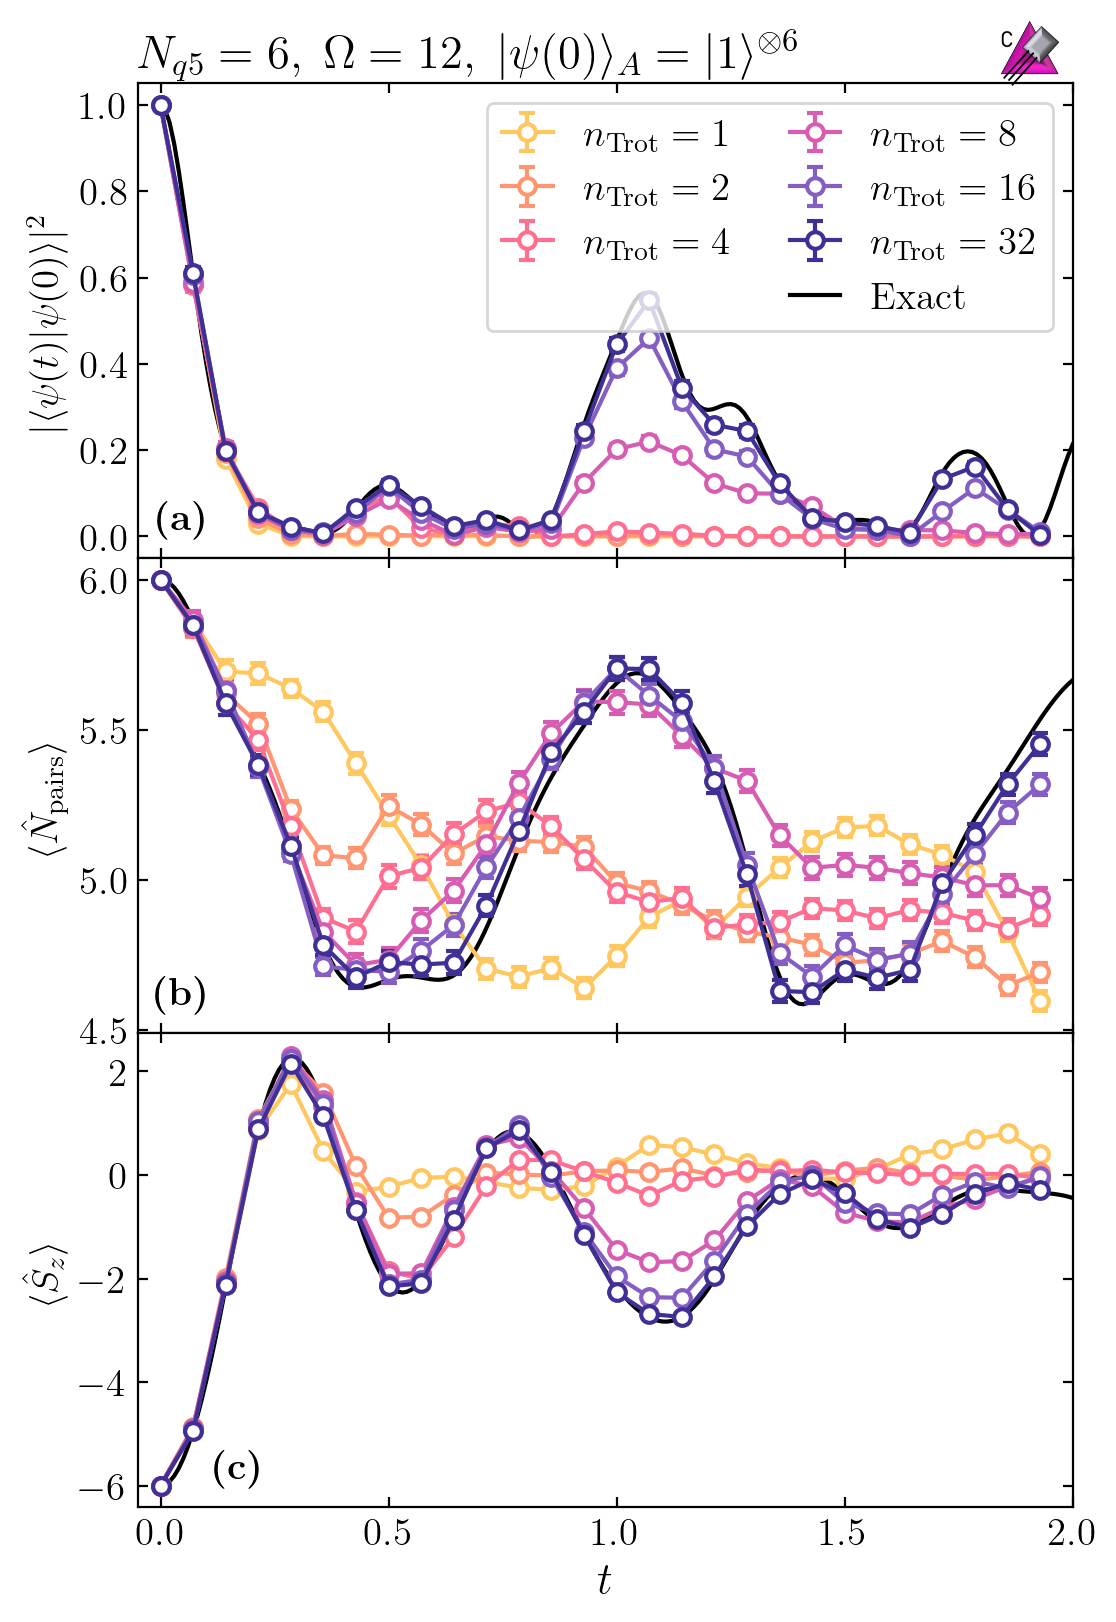

In [7]:
fig = plt.figure(figsize=(5.5, 8))
axs = fig.subplots(3,1, sharex=True)
plt.subplots_adjust(left=0.12, bottom=0.06, right=0.97, top=0.95, wspace=0, hspace=0)

colortrot =['#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2','#403095']

dataPsi0N6exact = np.transpose(np.genfromtxt(f'data/exact2/psi0_Np6_set3.dat'))
dataNpairN6exact = np.transpose(np.genfromtxt(f'data/exact2/npair_Np6_set3.dat'))
dataTzN6exact = np.transpose(np.genfromtxt(f'data/exact2/tz_Np6_set3.dat'))

axs[0].plot(dataPsi0N6exact[0],dataPsi0N6exact[1],c='k',marker='',ls='-',label=r'$\rm{{Exact}}$')
for indt,ntrot in enumerate(ntrotsteps):
    axs[0].errorbar(dataPsi0N6[indt,0],dataPsi0N6[indt,1],dataPsi0N6[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3,label=f'$n_{{\\rm{{Trot}}}}={ntrot}$')
axs[0].plot(np.NaN, np.NaN, '-', color='none', label=' ')  #Needed for extra space in legend between points and line
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles[2:5]+[handles[1]]+handles[5:]+[handles[0]], labels=labels[2:5]+[labels[1]]+labels[5:]+[labels[0]]
              ,ncol=2,handlelength=1.3,columnspacing=1.5,loc='upper right')
axs[0].set_xlim([-0.05,2])
axs[0].set_ylabel(r'$|\langle \psi(t)|\psi(0) \rangle|^2$', fontsize=14)
axs[0].tick_params(right=True, top=True, direction='in')
axs[0].text(0.05, 0.08, r'\bf (a)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title(r'$N_{{q5}} = 6,\; \Omega = 12,\; | \psi (0) \rangle_A=|1\rangle^{{\otimes 6}}$', loc='left')

axs[1].plot(dataNpairN6exact[0],dataNpairN6exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[1].errorbar(dataNpairN6[indt,0],dataNpairN6[indt,1],dataNpairN6[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[1].set_ylabel(r'$\langle \hat{N}_{\rm{pairs}}\rangle$', fontsize=14)
axs[1].tick_params(right=True, top=True, direction='in')
axs[1].text(0.05, 0.08, r'\bf (b)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[2].plot(dataTzN6exact[0],dataTzN6exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[2].errorbar(dataTzN6[indt,0],dataTzN6[indt,1],dataTzN6[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[2].set_xlabel(r'$t$', fontsize=16)
axs[2].set_ylabel(r'$\langle \hat{S}_{z} \rangle$', fontsize=14)
axs[2].tick_params(right=True, top=True, direction='in')
axs[2].text(0.11, 0.08, r'\bf (c)', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

fig.align_ylabels()

axIcon = fig.add_axes([0.9, 0.93, 0.06, 0.06], anchor='NE', zorder=30)
axIcon.imshow(imIcon)
axIcon.axis('off')

with PdfPages('Nq6_initwvfn2.pdf') as pdf:
    pdf.savefig(transparent=True)
    
plt.show()

In [8]:
npairs=8
tfin=2
npoints=28
nshots=1000

set3=[1,0.5,1.5]
params=set3

ntrotsteps = [1,2,4,8,16,32]

dataPsi0N8 = np.empty((len(ntrotsteps),3,npoints))
dataNpairN8 = np.empty((len(ntrotsteps),3,npoints))
dataTzN8 = np.empty((len(ntrotsteps),3,npoints))

for indt,ntrot in enumerate(ntrotsteps):
    for i in range(npoints):
        dt = tfin*i/npoints
        df = pd.read_hdf(f'data/simulator2/agassi_Np{npairs}_tf{tfin}_trot{ntrot}.h5', key=f't{i}')  
        dfArray =[df[j].map(str) for j in range(npairs)]
        shotsind = [''.join(j) for j in zip(*dfArray)]
        setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
        dataPsi0N8[indt,0,i] = dt
        if '11111111' not in setList.keys():
            setList['11111111'] = 0
        dataPsi0N8[indt,1,i] = setList['11111111']
        dataPsi0N8[indt,2,i] = np.sqrt(setList['11111111']*(1-setList['11111111'])/nshots)
        dataNpairN8[indt,0,i] = dt
        dataNpairN8[indt,1,i] = 0
        dataNpairN8[indt,2,i] = 0
        dataTzN8[indt,0,i] = dt
        dataTzN8[indt,1,i] = 0
        dataTzN8[indt,2,i] = 0
        
        for pa in range(npairs):
            dfArray =[df[pa].map(str)]
            shotsind = [''.join(j) for j in zip(*dfArray)]
            setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
            if '0' not in setList.keys():
                setList['0'] = 0
            if '1' not in setList.keys():
                setList['1'] = 0
            if '2' not in setList.keys():
                setList['2'] = 0
            if '3' not in setList.keys():
                setList['3'] = 0
            if '4' not in setList.keys():
                setList['4'] = 0
                
            dataNpairN8[indt,1,i] += (setList['1']*1 + setList['3']*1 + setList['4']*2)
            dataNpairN8[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots + 4*setList['4']*(1-setList['4'])/nshots
            
            dataTzN8[indt,1,i] += (setList['1']*-1 + setList['3']*1)
            dataTzN8[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots
            
        dataNpairN8[indt,2,i] = np.sqrt(dataNpairN8[indt,2,i])
        dataTzN8[indt,2,i] = np.sqrt(dataTzN8[indt,2,i])

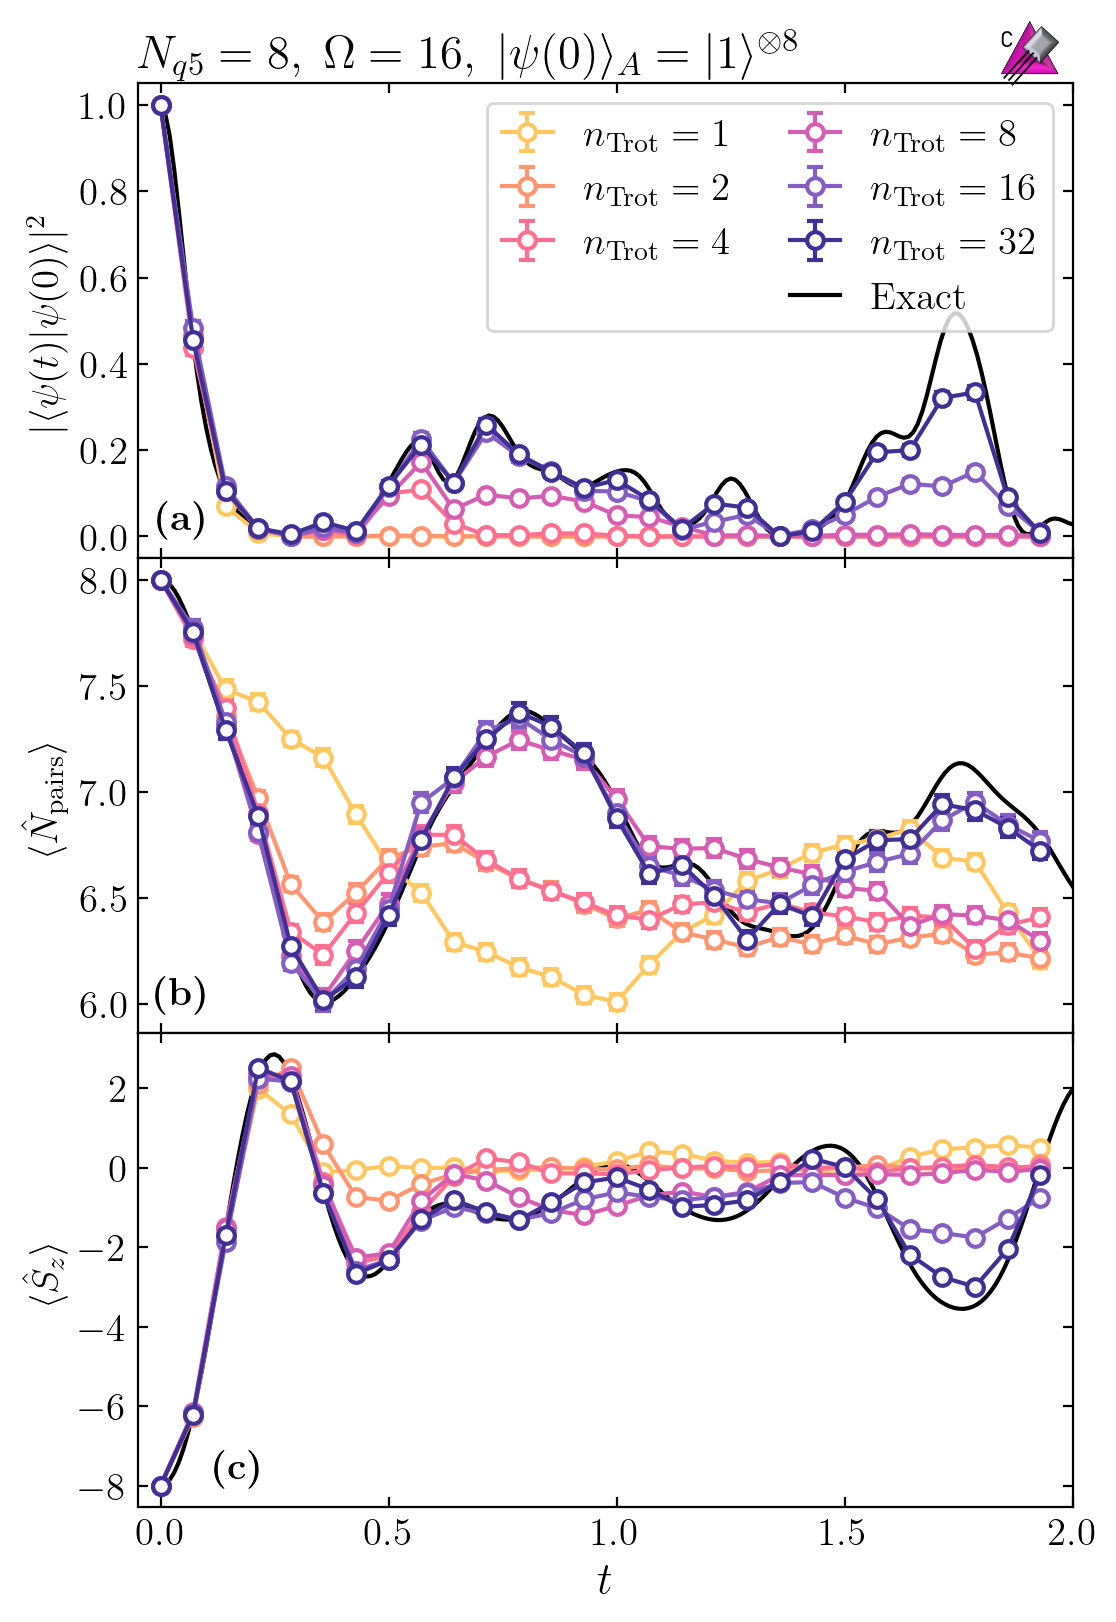

In [9]:
fig = plt.figure(figsize=(5.5, 8))
axs = fig.subplots(3,1, sharex=True)
plt.subplots_adjust(left=0.12, bottom=0.06, right=0.97, top=0.95, wspace=0, hspace=0)

colortrot =['#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2','#403095']

dataPsi0N8exact = np.transpose(np.genfromtxt(f'data/exact2/psi0_Np8_set3.dat'))
dataNpairN8exact = np.transpose(np.genfromtxt(f'data/exact2/npair_Np8_set3.dat'))
dataTzN8exact = np.transpose(np.genfromtxt(f'data/exact2/tz_Np8_set3.dat'))

axs[0].plot(dataPsi0N8exact[0],dataPsi0N8exact[1],c='k',marker='',ls='-',label=r'$\rm{{Exact}}$')
for indt,ntrot in enumerate(ntrotsteps):
    axs[0].errorbar(dataPsi0N8[indt,0],dataPsi0N8[indt,1],dataPsi0N8[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3,label=f'$n_{{\\rm{{Trot}}}}={ntrot}$')
axs[0].plot(np.NaN, np.NaN, '-', color='none', label=' ') #Needed for extra space in legend between points and line
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles[2:5]+[handles[1]]+handles[5:]+[handles[0]], labels=labels[2:5]+[labels[1]]+labels[5:]+[labels[0]]
              ,ncol=2,handlelength=1.3,columnspacing=1.5,loc='upper right')
axs[0].set_xlim([-0.05,2])
axs[0].set_ylabel(r'$|\langle \psi(t)|\psi(0) \rangle|^2$', fontsize=14)
axs[0].tick_params(right=True, top=True, direction='in')
axs[0].text(0.05, 0.08, r'\bf (a)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title(r'$N_{{q5}} = 8,\; \Omega = 16,\; | \psi (0) \rangle_A=|1\rangle^{{\otimes 8}}$', loc='left')

axs[1].plot(dataNpairN8exact[0],dataNpairN8exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[1].errorbar(dataNpairN8[indt,0],dataNpairN8[indt,1],dataNpairN8[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[1].set_ylabel(r'$\langle \hat{N}_{\rm{pairs}}\rangle$', fontsize=14)
axs[1].tick_params(right=True, top=True, direction='in')
axs[1].text(0.05, 0.08, r'\bf (b)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[2].plot(dataTzN8exact[0],dataTzN8exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[2].errorbar(dataTzN8[indt,0],dataTzN8[indt,1],dataTzN8[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[2].set_xlabel(r'$t$', fontsize=16)
axs[2].set_ylabel(r'$\langle \hat{S}_{z} \rangle$', fontsize=14)
axs[2].tick_params(right=True, top=True, direction='in')
axs[2].text(0.11, 0.08, r'\bf (c)', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

fig.align_ylabels()

axIcon = fig.add_axes([0.9, 0.93, 0.06, 0.06], anchor='NE', zorder=30)
axIcon.imshow(imIcon)
axIcon.axis('off')

with PdfPages('Nq8_initwvfn2.pdf') as pdf:
    pdf.savefig(transparent=True)
    
plt.show()

In [10]:
npairs=10
tfin=2
npoints=28
nshots=1000

set3=[1,0.5,1.5]
params=set3

ntrotsteps = [1,2,4,8,16,32]

dataPsi0N10 = np.empty((len(ntrotsteps),3,npoints))
dataNpairN10 = np.empty((len(ntrotsteps),3,npoints))
dataTzN10 = np.empty((len(ntrotsteps),3,npoints))

for indt,ntrot in enumerate(ntrotsteps):
    for i in range(npoints):
        dt = tfin*i/npoints
        df = pd.read_hdf(f'data/simulator2/agassi_Np{npairs}_tf{tfin}_trot{ntrot}.h5', key=f't{i}')  
        dfArray =[df[j].map(str) for j in range(npairs)]
        shotsind = [''.join(j) for j in zip(*dfArray)]
        setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
        
        dataPsi0N10[indt,0,i] = dt
        if '1111111111' not in setList.keys():
            setList['1111111111'] = 0
        dataPsi0N10[indt,1,i] = setList['1111111111']
        dataPsi0N10[indt,2,i] = np.sqrt(setList['1111111111']*(1-setList['1111111111'])/nshots)
        
        dataNpairN10[indt,0,i] = dt
        dataNpairN10[indt,1,i] = 0
        dataNpairN10[indt,2,i] = 0
        dataTzN10[indt,0,i] = dt
        dataTzN10[indt,1,i] = 0
        dataTzN10[indt,2,i] = 0
        
        for pa in range(npairs):
            dfArray =[df[pa].map(str)]
            shotsind = [''.join(j) for j in zip(*dfArray)]
            setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
            if '0' not in setList.keys():
                setList['0'] = 0
            if '1' not in setList.keys():
                setList['1'] = 0
            if '2' not in setList.keys():
                setList['2'] = 0
            if '3' not in setList.keys():
                setList['3'] = 0
            if '4' not in setList.keys():
                setList['4'] = 0
                
            dataNpairN10[indt,1,i] += (setList['1']*1 + setList['3']*1 + setList['4']*2)
            dataNpairN10[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots + 4*setList['4']*(1-setList['4'])/nshots
            
            dataTzN10[indt,1,i] += (setList['1']*-1 + setList['3']*1)
            dataTzN10[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots
            
        dataNpairN10[indt,2,i] = np.sqrt(dataNpairN10[indt,2,i])
        dataTzN10[indt,2,i] = np.sqrt(dataTzN10[indt,2,i])

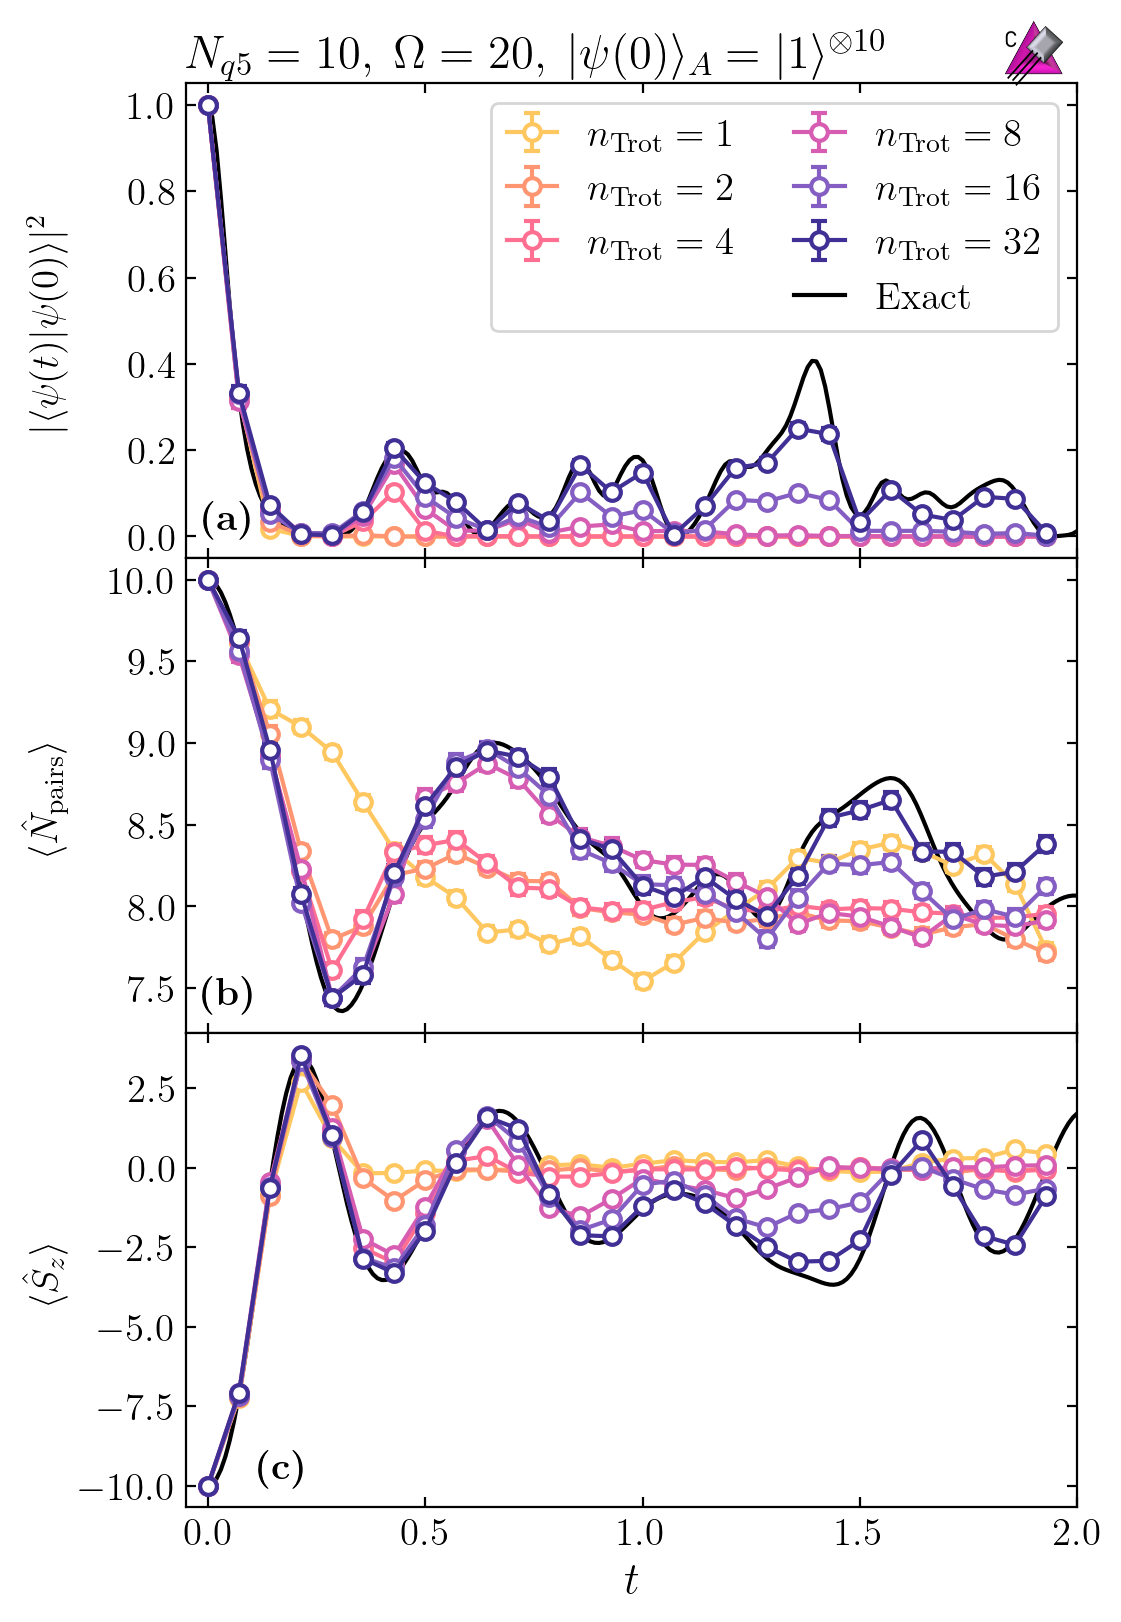

In [11]:
fig = plt.figure(figsize=(5.5, 8))
axs = fig.subplots(3,1, sharex=True)
plt.subplots_adjust(left=0.16, bottom=0.06, right=0.97, top=0.95, wspace=0, hspace=0)

colortrot =['#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2','#403095']

dataPsi0N10exact = np.transpose(np.genfromtxt(f'data/exact2/psi0_Np10_set3.dat'))
dataNpairN10exact = np.transpose(np.genfromtxt(f'data/exact2/npair_Np10_set3.dat'))
dataTzN10exact = np.transpose(np.genfromtxt(f'data/exact2/tz_Np10_set3.dat'))

axs[0].plot(dataPsi0N10exact[0],dataPsi0N10exact[1],c='k',marker='',ls='-',label=r'$\rm{{Exact}}$')
for indt,ntrot in enumerate(ntrotsteps):
    axs[0].errorbar(dataPsi0N10[indt,0],dataPsi0N10[indt,1],dataPsi0N10[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3,label=f'$n_{{\\rm{{Trot}}}}={ntrot}$')
axs[0].plot(np.NaN, np.NaN, '-', color='none', label=' ') #Needed for extra space in legend between points and line
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles[2:5]+[handles[1]]+handles[5:]+[handles[0]], labels=labels[2:5]+[labels[1]]+labels[5:]+[labels[0]]
              ,ncol=2,handlelength=1.3,columnspacing=1.5,loc='upper right')
axs[0].set_xlim([-0.05,2])
axs[0].set_ylabel(r'$|\langle \psi(t)|\psi(0) \rangle|^2$', fontsize=14)
axs[0].tick_params(right=True, top=True, direction='in')
axs[0].text(0.05, 0.08, r'\bf (a)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title(r'$N_{{q5}} = 10,\; \Omega = 20,\; | \psi (0) \rangle_A=|1\rangle^{{\otimes 10}}$', loc='left')

axs[1].plot(dataNpairN10exact[0],dataNpairN10exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[1].errorbar(dataNpairN10[indt,0],dataNpairN10[indt,1],dataNpairN10[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[1].set_ylabel(r'$\langle \hat{N}_{\rm{pairs}}\rangle$', fontsize=14)
axs[1].tick_params(right=True, top=True, direction='in')
axs[1].text(0.05, 0.08, r'\bf (b)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[2].plot(dataTzN10exact[0],dataTzN10exact[1],c='k',marker='',ls='-')
for indt,ntrot in enumerate(ntrotsteps):
    axs[2].errorbar(dataTzN10[indt,0],dataTzN10[indt,1],dataTzN10[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[2].set_xlabel(r'$t$', fontsize=16)
axs[2].set_ylabel(r'$\langle \hat{S}_{z} \rangle$', fontsize=14)
axs[2].tick_params(right=True, top=True, direction='in')
axs[2].text(0.11, 0.08, r'\bf (c)', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

fig.align_ylabels()

axIcon = fig.add_axes([0.9, 0.93, 0.06, 0.06], anchor='NE', zorder=30)
axIcon.imshow(imIcon)
axIcon.axis('off')

with PdfPages('Nq10_initwvfn2.pdf') as pdf:
    pdf.savefig(transparent=True)
    
plt.show()

In [4]:
npairs=12
tfin=2
npoints=28
nshots=1000

set3=[1,0.5,1.5]
params=set3

ntrotsteps = [1,2,4,8,16]

dataPsi0N12 = np.empty((len(ntrotsteps),3,npoints))
dataNpairN12 = np.empty((len(ntrotsteps),3,npoints))
dataTzN12 = np.empty((len(ntrotsteps),3,npoints))

for indt,ntrot in enumerate(ntrotsteps):
    for i in range(npoints):
        dt = tfin*i/npoints
        df = pd.read_hdf(f'data/simulator2/agassi_Np{npairs}_tf{tfin}_trot{ntrot}.h5', key=f't{i}')  
        dfArray =[df[j].map(str) for j in range(npairs)]
        shotsind = [''.join(j) for j in zip(*dfArray)]
        setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
        
        dataPsi0N12[indt,0,i] = dt
        if '111111111111' not in setList.keys():
            setList['111111111111'] = 0
        dataPsi0N12[indt,1,i] = setList['111111111111']
        dataPsi0N12[indt,2,i] = np.sqrt(setList['111111111111']*(1-setList['111111111111'])/nshots)
        
        dataNpairN12[indt,0,i] = dt
        dataNpairN12[indt,1,i] = 0
        dataNpairN12[indt,2,i] = 0
        dataTzN12[indt,0,i] = dt
        dataTzN12[indt,1,i] = 0
        dataTzN12[indt,2,i] = 0
        
        for pa in range(npairs):
            dfArray =[df[pa].map(str)]
            shotsind = [''.join(j) for j in zip(*dfArray)]
            setList = {j:shotsind.count(j)/nshots for j in list(set(shotsind))}
            if '0' not in setList.keys():
                setList['0'] = 0
            if '1' not in setList.keys():
                setList['1'] = 0
            if '2' not in setList.keys():
                setList['2'] = 0
            if '3' not in setList.keys():
                setList['3'] = 0
            if '4' not in setList.keys():
                setList['4'] = 0
                
            dataNpairN12[indt,1,i] += (setList['1']*1 + setList['3']*1 + setList['4']*2)
            dataNpairN12[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots + 4*setList['4']*(1-setList['4'])/nshots
            
            dataTzN12[indt,1,i] += (setList['1']*-1 + setList['3']*1)
            dataTzN12[indt,2,i] += setList['1']*(1-setList['1'])/nshots 
            + setList['3']*(1-setList['3'])/nshots
            
        dataNpairN12[indt,2,i] = np.sqrt(dataNpairN12[indt,2,i])
        dataTzN12[indt,2,i] = np.sqrt(dataTzN12[indt,2,i])

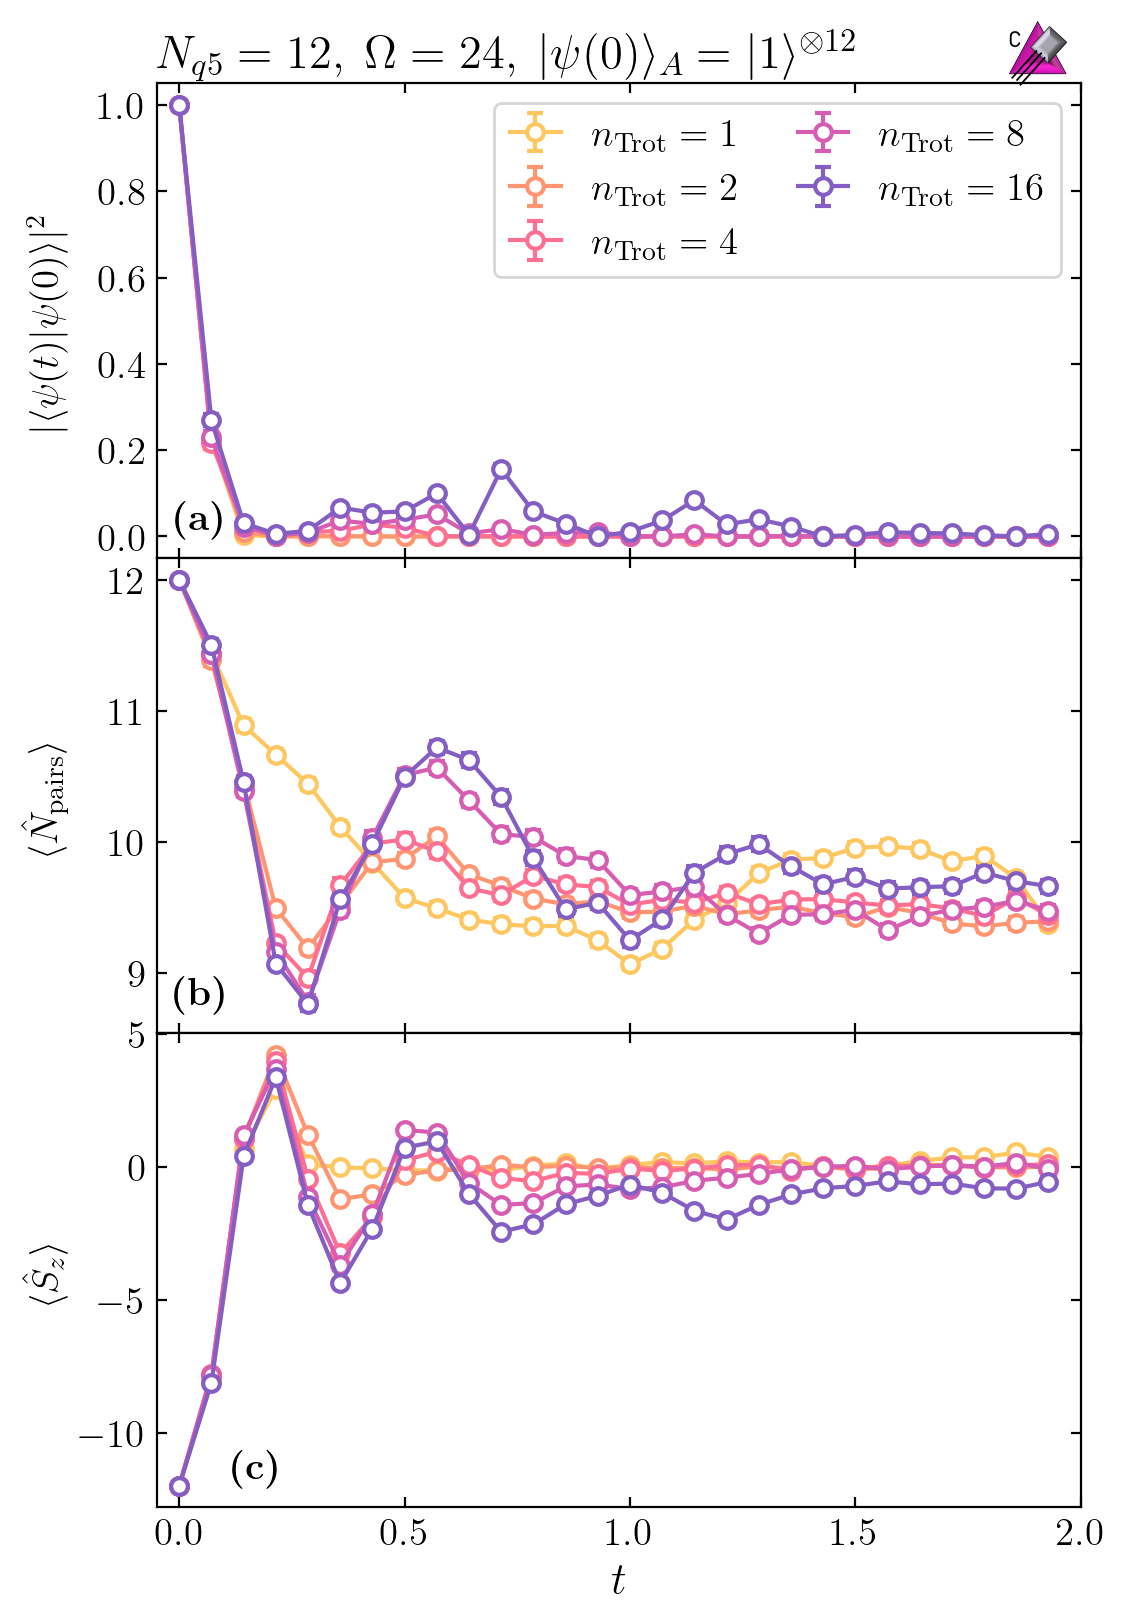

In [7]:
fig = plt.figure(figsize=(5.5, 8))
axs = fig.subplots(3,1, sharex=True)
plt.subplots_adjust(left=0.13, bottom=0.06, right=0.97, top=0.95, wspace=0, hspace=0)

colortrot =['#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2','#403095']

for indt,ntrot in enumerate(ntrotsteps):
    axs[0].errorbar(dataPsi0N12[indt,0],dataPsi0N12[indt,1],dataPsi0N12[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3,label=f'$n_{{\\rm{{Trot}}}}={ntrot}$')
axs[0].legend(ncol=2,handlelength=1.3,columnspacing=1.5,loc='upper right')
axs[0].set_xlim([-0.05,2])
axs[0].set_ylabel(r'$|\langle \psi(t)|\psi(0) \rangle|^2$', fontsize=14)
axs[0].tick_params(right=True, top=True, direction='in')
axs[0].text(0.05, 0.08, r'\bf (a)', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title(r'$N_{{q5}} = 12,\; \Omega = 24,\; | \psi (0) \rangle_A=|1\rangle^{{\otimes 12}}$', loc='left')

for indt,ntrot in enumerate(ntrotsteps):
    axs[1].errorbar(dataNpairN12[indt,0],dataNpairN12[indt,1],dataNpairN12[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[1].set_ylabel(r'$\langle \hat{N}_{\rm{pairs}}\rangle$', fontsize=14)
axs[1].tick_params(right=True, top=True, direction='in')
axs[1].text(0.05, 0.08, r'\bf (b)', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

for indt,ntrot in enumerate(ntrotsteps):
    axs[2].errorbar(dataTzN12[indt,0],dataTzN12[indt,1],dataTzN12[indt,2],mec=colortrot[indt],ecolor=colortrot[indt],marker='o',mew=1.5,mfc='white',c=colortrot[indt],ls='-',capsize=3)
axs[2].set_xlabel(r'$t$', fontsize=16)
axs[2].set_ylabel(r'$\langle \hat{S}_{z} \rangle$', fontsize=14)
axs[2].tick_params(right=True, top=True, direction='in')
axs[2].text(0.11, 0.08, r'\bf (c)', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

fig.align_ylabels()

axIcon = fig.add_axes([0.9, 0.93, 0.06, 0.06], anchor='NE', zorder=30)
axIcon.imshow(imIcon)
axIcon.axis('off')

with PdfPages('Nq12_initwvfn2.pdf') as pdf:
    pdf.savefig(transparent=True)
    
plt.show()